In [1]:
import os
import matplotlib.pyplot as plt
import skimage.io
import skimage.transform

In [2]:
training_dataset_path = "../input/dataset/dataset_updated/training_set"
test_dataset_path = "../input/dataset/dataset_updated/validation_set"

# categories to use
# categories = ['drawings', 'engraving', 'iconography', 'painting']
categories = ['drawings', 'engraving', 'iconography', 'painting', 'sculpture']
n_categories = len(categories)
category_embeddings = {
    'drawings': 0,
    'engraving': 1,
    'iconography': 2,
    'painting': 3,
    'sculpture': 4
}

# After computing the mean image size, we can set a default width and a default height to resize the images
# Warning : this is a convention that I decided to use
width = 128 # 368
height = 128 # 352
n_channels = 3


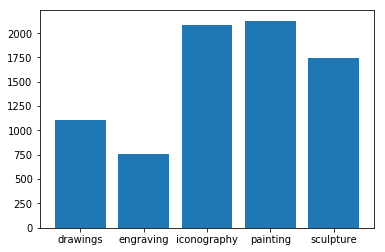

In [3]:
# training dataset metadata
n_imgs = []
for cat in categories:
    files = os.listdir(os.path.join(training_dataset_path, cat))
    n_imgs += [len(files)]
    
plt.bar([_ for _ in range(n_categories)], n_imgs, tick_label=categories)
plt.show()


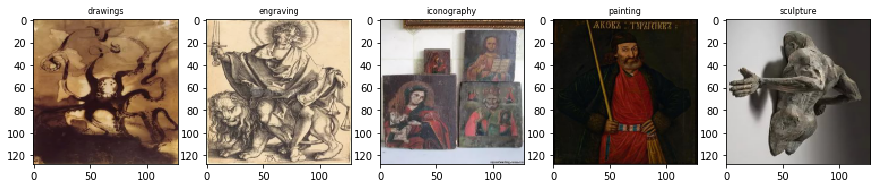

In [4]:
#plotting sample images from training dataset
fig, axes = plt.subplots(nrows=1, ncols=n_categories, figsize=(15, 3))

cat_cpt=0
for cat in categories:
    category_path = os.path.join(training_dataset_path, cat)
    img_name = os.listdir(category_path)[0]
    img = skimage.io.imread(os.path.join(category_path, img_name))
    img = skimage.transform.resize(img, (width, height, n_channels), mode='reflect')
    axes[cat_cpt].imshow(img, resample=True)
    axes[cat_cpt].set_title(cat, fontsize=8)
    cat_cpt += 1

plt.show()


In [5]:
#preprocessing
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_set = train_datagen.flow_from_directory(
    directory="../input/dataset/dataset_updated/training_set/",
    target_size=(64, 64),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)
test_set = train_datagen.flow_from_directory(
    directory="../input/dataset/dataset_updated/validation_set/",
    target_size=(64, 64),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)
def my_gen(gen):
    while True:
        try:
            data, labels = next(gen)
            yield data, labels
        except:
            pass






Using TensorFlow backend.


Found 7819 images belonging to 5 classes.
Found 866 images belonging to 5 classes.


In [6]:
#implementing cnn
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

#benchmark model

model=Sequential()

#single layer

model.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#dense layers

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit_generator(my_gen(train_set),steps_per_epoch=20,epochs=50,
                    validation_data=my_gen(test_set),validation_steps=20)

Epoch 1/50
20/20 [==============================] - 10s 487ms/step - loss: 1.5518 - acc: 0.3453 - val_loss: 1.2523 - val_acc: 0.4641
Epoch 2/50
20/20 [==============================] - 6s 296ms/step - loss: 1.2503 - acc: 0.5016 - val_loss: 1.0616 - val_acc: 0.6086
Epoch 3/50
20/20 [==============================] - 7s 349ms/step - loss: 1.0615 - acc: 0.6406 - val_loss: 0.9918 - val_acc: 0.6164
Epoch 4/50
20/20 [==============================] - 6s 323ms/step - loss: 0.9975 - acc: 0.6484 - val_loss: 0.9076 - val_acc: 0.6721
Epoch 5/50
20/20 [==============================] - 7s 374ms/step - loss: 0.9439 - acc: 0.6562 - val_loss: 0.9898 - val_acc: 0.6098
Epoch 6/50
20/20 [==============================] - 5s 261ms/step - loss: 1.0143 - acc: 0.6047 - val_loss: 0.8753 - val_acc: 0.6836
Epoch 7/50
20/20 [==============================] - 7s 331ms/step - loss: 0.9234 - acc: 0.6562 - val_loss: 0.8296 - val_acc: 0.7180
Epoch 8/50
20/20 [==============================] - 6s 282ms/step - loss: 0

/opt/conda/lib/python3.6/site-packages/PIL/Image.py:918: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


20/20 [==============================] - 6s 310ms/step - loss: 0.8211 - acc: 0.7031 - val_loss: 0.8194 - val_acc: 0.7098
Epoch 11/50
13/20 [==================>...........] - ETA: 0s - loss: 0.8120 - acc: 0.7212

/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6029312 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1311848 bytes but only got 785. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:756: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 8. 
  warnings.warn(str(msg))


20/20 [==============================] - 6s 277ms/step - loss: 0.8168 - acc: 0.7188 - val_loss: 0.7484 - val_acc: 0.7475
Epoch 12/50
20/20 [==============================] - 5s 264ms/step - loss: 0.7831 - acc: 0.7109 - val_loss: 0.8141 - val_acc: 0.6918
Epoch 13/50
20/20 [==============================] - 6s 297ms/step - loss: 0.7979 - acc: 0.7141 - val_loss: 0.6863 - val_acc: 0.7803
Epoch 14/50
20/20 [==============================] - 5s 265ms/step - loss: 0.8150 - acc: 0.6984 - val_loss: 0.7068 - val_acc: 0.7918
Epoch 15/50
20/20 [==============================] - 6s 311ms/step - loss: 0.7689 - acc: 0.7109 - val_loss: 0.7487 - val_acc: 0.7574
Epoch 16/50
20/20 [==============================] - 6s 281ms/step - loss: 0.7997 - acc: 0.7094 - val_loss: 0.7619 - val_acc: 0.7164
Epoch 17/50
20/20 [==============================] - 5s 260ms/step - loss: 0.7520 - acc: 0.7220 - val_loss: 0.6734 - val_acc: 0.7541
Epoch 18/50
20/20 [==============================] - 6s 289ms/step - loss: 0.7472

In [7]:
#My original model
model_2=Sequential()

#first convolution layer

model_2.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.2))

#second convolution layer

model_2.add(Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.2))

#dense layers

model_2.add(Flatten())
model_2.add(Dense(500, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(5,activation='softmax'))

#compile the model
model_2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model_2.fit_generator(my_gen(train_set),steps_per_epoch=20,epochs=50,
                    validation_data=my_gen(test_set),validation_steps=20)

Exception ignored in: <generator object my_gen at 0x7fd2c40f13b8>
RuntimeError: generator ignored GeneratorExit


Epoch 1/50
20/20 [==============================] - 7s 359ms/step - loss: 1.5339 - acc: 0.3438 - val_loss: 1.3555 - val_acc: 0.4213
Epoch 2/50
20/20 [==============================] - 5s 263ms/step - loss: 1.2231 - acc: 0.5250 - val_loss: 1.2385 - val_acc: 0.5443
Epoch 3/50
20/20 [==============================] - 6s 296ms/step - loss: 1.0005 - acc: 0.6266 - val_loss: 0.9744 - val_acc: 0.6656
Epoch 4/50
19/20 [===========================>..] - ETA: 0s - loss: 0.9672 - acc: 0.6464

/opt/conda/lib/python3.6/site-packages/PIL/Image.py:918: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


20/20 [==============================] - 5s 268ms/step - loss: 0.9757 - acc: 0.6406 - val_loss: 1.0578 - val_acc: 0.6164
Epoch 5/50
20/20 [==============================] - 6s 277ms/step - loss: 0.9405 - acc: 0.6375 - val_loss: 1.0101 - val_acc: 0.6016
Epoch 6/50
20/20 [==============================] - 5s 274ms/step - loss: 0.8429 - acc: 0.7047 - val_loss: 0.8473 - val_acc: 0.7049
Epoch 7/50
19/20 [===========================>..] - ETA: 0s - loss: 0.7609 - acc: 0.7126

/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6029312 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1311848 bytes but only got 785. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:756: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 8. 
  warnings.warn(str(msg))


20/20 [==============================] - 6s 277ms/step - loss: 0.7850 - acc: 0.7066 - val_loss: 0.7834 - val_acc: 0.7213
Epoch 8/50
20/20 [==============================] - 6s 317ms/step - loss: 0.7495 - acc: 0.7156 - val_loss: 0.8177 - val_acc: 0.6967
Epoch 9/50
20/20 [==============================] - 6s 300ms/step - loss: 0.8689 - acc: 0.6937 - val_loss: 0.8476 - val_acc: 0.6984
Epoch 10/50
20/20 [==============================] - 6s 291ms/step - loss: 0.7564 - acc: 0.7297 - val_loss: 0.8788 - val_acc: 0.6672
Epoch 11/50
20/20 [==============================] - 5s 245ms/step - loss: 0.7800 - acc: 0.7250 - val_loss: 0.7076 - val_acc: 0.7787
Epoch 12/50
20/20 [==============================] - 6s 307ms/step - loss: 0.7276 - acc: 0.7375 - val_loss: 0.7791 - val_acc: 0.7049
Epoch 13/50
20/20 [==============================] - 5s 237ms/step - loss: 0.7572 - acc: 0.7172 - val_loss: 0.7354 - val_acc: 0.7426
Epoch 14/50
20/20 [==============================] - 6s 315ms/step - loss: 0.7502 -

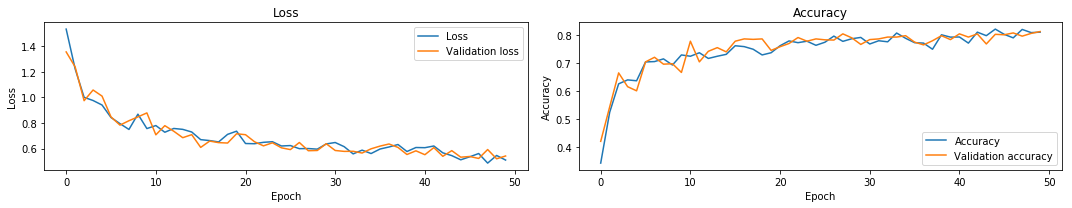

In [8]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

axes[0].plot(history.history['loss'], label="Loss")
axes[0].plot(history.history['val_loss'], label="Validation loss")
axes[0].set_title('Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

axes[1].plot(history.history['acc'], label="Accuracy")
axes[1].plot(history.history['val_acc'], label="Validation accuracy")
axes[1].set_title('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
plt.tight_layout()

plt.show()


